In [270]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC


In [240]:
cont_factory = pd.read_csv("continuous_factory_process.csv",sep=",")

In [241]:
X_f1 = cont_factory.iloc[:,1:42]   # regression dataset 1

In [242]:
y_f1 = cont_factory.iloc[:,43:72]

In [243]:
cofac = cont_factory.corr()

In [ ]:
plt.figure(figsize=(19,6))

sns.distplot(y_f1)

In [179]:
train_stdr = pd.read_csv("train.csv",sep=",")

In [ ]:
X_f1.info()

In [272]:
fem_data = pd.read_csv("5184doe.csv",sep=",")

In [273]:

X = fem_data.iloc[:,1:10]   #regression dataset 2
y = fem_data.iloc[:,10:]

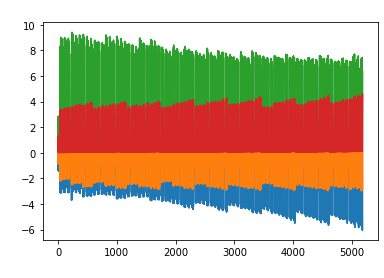

In [320]:
plt.plot(y)
plt.title('Multi output regression',color="white")
plt.xlabel('Simulation runs',color="white")
plt.ylabel('Stress values',color="white")
plt.show()

In [311]:

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mr_t    5184 non-null   float64
 1   Mt_t    5184 non-null   float64
 2   Mr_c    5184 non-null   float64
 3   Mt_c    5184 non-null   float64
dtypes: float64(4)
memory usage: 162.1 KB


In [274]:
femcorr = fem_data.corr()

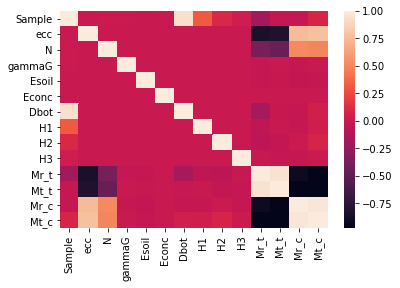

In [275]:
sns.heatmap(femcorr)

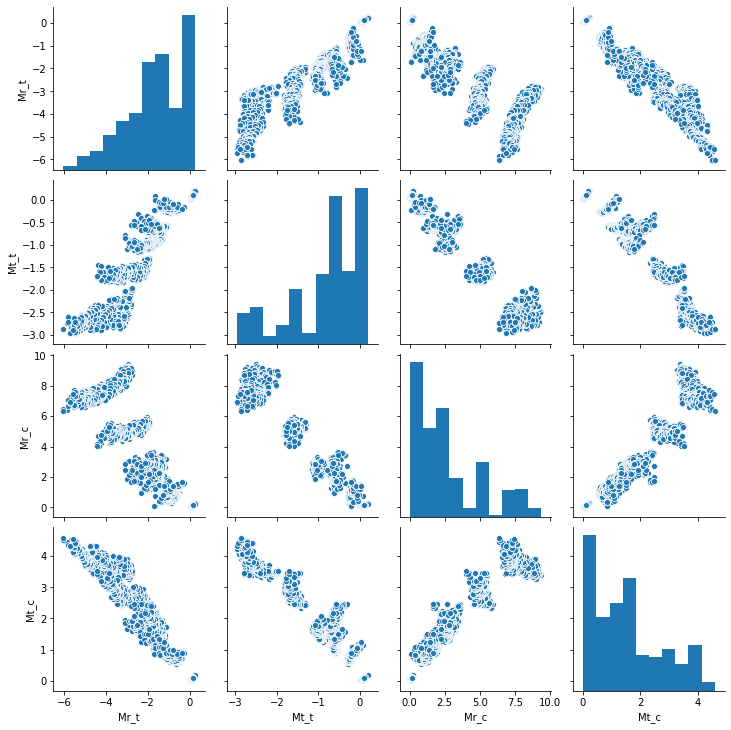

In [279]:
sns.pairplot(y)

In [194]:
X_class = train_stdr.iloc[:,2:]
y_class = train_stdr.iloc[:,1]    ### classification dataset

In [237]:
X_class.head()



,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [15]:
fc = fem_data.corr()

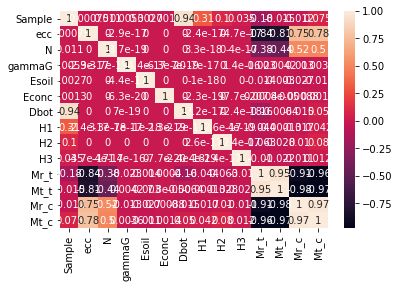

In [18]:
sns.heatmap(fc,annot=True)

In [19]:
fem_data.pivot_table(index="Sample")

,Dbot,Econc,Esoil,H1,H2,H3,Mr_c,Mr_t,Mt_c,Mt_t,N,ecc,gammaG
Sample,,,,,,,,,,,,,
1,17,30000,25,0.8,1.0,0.8,0.082100,0.082100,0.055648,0.055648,2000,0,0.9
2,17,30000,25,0.8,1.0,0.8,1.160648,-0.597084,0.605016,-0.233470,2000,10,0.9
3,17,30000,25,0.8,1.0,0.8,1.908188,-1.094196,0.947770,-0.566130,2000,18,0.9
4,17,30000,25,0.8,1.0,0.8,2.844706,-1.416485,1.310545,-0.865039,2000,26,0.9
5,17,37000,25,0.8,1.0,0.8,0.079570,0.079570,0.054213,0.054213,2000,0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,23,30000,75,1.6,2.0,1.6,6.471047,-6.027412,4.499262,-2.866107,5000,26,1.1
5181,23,37000,75,1.6,2.0,1.6,0.143146,0.143146,0.108935,0.108935,5000,0,1.1
5182,23,37000,75,1.6,2.0,1.6,1.702752,-2.671362,2.465506,-0.561849,5000,10,1.1


[ 4.15149424  1.25374967 -2.18264038 -2.41788406]
[[-1.25015955e-01 -3.55923483e-04 -3.38102336e-01 -7.09342013e-04
  -1.21795167e-07 -9.22983289e-02 -1.89239382e-01 -2.27053800e-01
  -4.86693148e-02]
 [-7.25896490e-02 -2.53517310e-04  1.38605029e-02 -6.43770866e-05
  -1.03289528e-06 -1.10376975e-03  1.20246502e-03 -5.59396236e-02
  -5.57114850e-02]
 [ 1.93145447e-01  8.53842879e-04 -2.71703306e-01 -2.76942704e-03
   4.14660315e-06 -1.72184750e-02 -1.30230911e-01  6.98729791e-02
  -8.06726181e-02]
 [ 9.95203036e-02  4.08418689e-04  5.40260598e-02 -5.81851338e-04
   1.42493066e-06  2.33697861e-02  1.57414160e-01  2.46769195e-01
   5.51928405e-02]]
Score =0.8536573178685575
Mean Absolute Error: 0.48136275628348746
Mean Squared Error: 0.3970183054807188
Root Mean Squared Error: 0.6300938862429303
R2 Score 0.8640142694758143


C:\Users\Narasyimmha\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


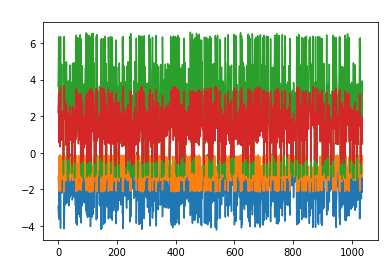

In [328]:
# import libraries
import pandas as pd
import numpy as np


### Linear regression


#split dataset into test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# === Step 2: Fit MLE to training set using all variables ===
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict test set result
y_pred = regressor.predict(X_test)

#For retrieving the intercept and slopes/coefficients
print(regressor.intercept_)
print(regressor.coef_)

#Check the quality
print('Score =' + str(regressor.score(X, y)))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test, y_pred))

plt.plot(y_pred)
plt.title('Linear regression',color="white")
plt.xlabel('Simulation runs',color="white")
plt.ylabel('Stress values',color="white")
plt.show()



In [102]:
y

,Mr_t,Mt_t,Mr_c,Mt_c
0,0.082100,0.055648,0.082100,0.055648
1,-0.597084,-0.233470,1.160648,0.605016
2,-1.094196,-0.566130,1.908188,0.947770
3,-1.416485,-0.865039,2.844706,1.310545
4,0.079570,0.054213,0.079570,0.054213
...,...,...,...,...
5179,-6.027412,-2.866107,6.471047,4.499262
5180,0.143146,0.108935,0.143146,0.108935
5181,-2.671362,-0.561849,1.702752,2.465506
5182,-4.408298,-1.696514,4.021527,3.522614


C:\Users\Narasyimmha\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Score =0.999384569522735
Mean Absolute Error: 0.036314909034102075
Mean Squared Error: 0.00473687563764214
Root Mean Squared Error: 0.06882496376782293
MAPE: 1.9280621613774673
R2 Score 0.9985175328615628
Median Absolute Error 0.019399625591999647


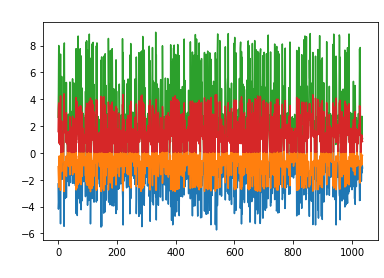

In [330]:
### Random forest regression


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# split dataset into test and train (1-test) dataset
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)


#prediction of new value
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Score =' + str(regressor.score(X, y)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test, y_pred))
from sklearn.metrics import median_absolute_error
print("Median Absolute Error", median_absolute_error(y_test,y_pred))

plt.plot(y_pred)
plt.title('Random forest regression',color="white")
plt.xlabel('Simulation runs',color="white")
plt.ylabel('Stress values',color="white")
plt.show()



C:\Users\Narasyimmha\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Score =0.9995133255558266
Mean Absolute Error: 0.034268368595451626
Mean Squared Error: 0.0063262780046297
Root Mean Squared Error: 0.07953790294337473
MAPE: 1.6643780292211743
R2 Score 0.9979545957789437


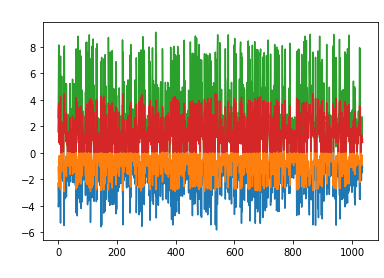

In [331]:
# split dataset into test and train (1-test) dataset
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(min_samples_split  = 10)
regressor = DecisionTreeRegressor(min_samples_leaf  = 1)

regressor.fit(X_train, y_train)


#prediction of new value
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Score =' + str(regressor.score(X, y)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_pred)))
print("R2 Score",r2_score(y_test, y_pred))

#visualisiong the Decision tree Regression results
plt.plot(y_pred)
plt.title('Decision tree regression',color="white")
plt.xlabel('Simulation runs',color="white")
plt.ylabel('Stress values',color="white")
plt.show()

In [125]:
### kernel svm classifiier

#Splitting into training and test set

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.25, random_state=0)


#Feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Fitting kernel SVM to training set

classifier = SVC(kernel = 'rbf',  random_state = 0)
classifier.fit(X_train, y_train)

#Predicting test set result
y_pred = classifier.predict(X_test)


# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('Recall: %f' % f1)
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

[[44523   379]
 [ 3909  1189]]
Accuracy: 0.914240
Precision: 0.758291
Recall: 0.233229
Recall: 0.356736
ROC AUC: 0.612394


In [173]:
### Random forest classifier

# splitting into training and test set

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.25, random_state=0)



#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Fitting Randomforest  to training set
classifier = RandomForestClassifier(n_estimators = 100, oob_score=True, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


#Predicting test set result
y_pred = classifier.predict(X_test)

print (classifier.oob_score_)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('Recall: %f' % f1)
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

0.90002
[[44902     0]
 [ 5098     0]]
Accuracy: 0.898040
Precision: 0.000000
Recall: 0.000000
Recall: 0.000000
ROC AUC: 0.500000


C:\Users\Narasyimmha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

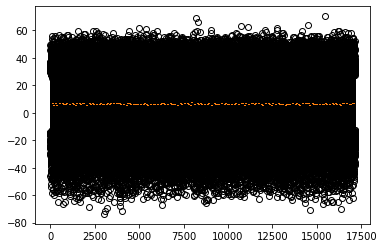

In [281]:
### Logistic regression




#Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.25, random_state=0)



# === Box plot === #
plt.boxplot(X_train)


#Feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#plt.boxplot(X_train)

X_test = sc_X.transform(X_test)

#Fitting Logistic regression to training set

classifier = LogisticRegression(random_state = 0, verbose = 2)
classifier.fit(X_train, y_train)


#Predicting test set result
y_pred = classifier.predict(X_test)
classes = classifier.classes_

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('Recall: %f' % f1)
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)


#Visualising training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()




#Visualising test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



In [177]:
### Gaussian Naive bayes


from sklearn.naive_bayes import GaussianNB

X_class1 = X_pca.iloc[:,1:]
y_class = train_stdr.iloc[:,1]


#Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.25, random_state=0)


#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Fitting Naive Bayes to training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)


#Predicting test set result
y_pred = classifier.predict(X_test)


# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('Recall: %f' % f1)
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)




[[44153   749]
 [ 3277  1821]]
Accuracy: 0.919480
Precision: 0.708560
Recall: 0.357199
Recall: 0.474961
ROC AUC: 0.670259
